In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
from pathlib import Path
import pathlib
import sys
import warnings


In [454]:
def add_axes(ax, minor=True):

    axx = ax.secondary_xaxis('top')
    axx.tick_params(
        which='both',
        direction='in',
        labeltop=False,)

    axy = ax.secondary_yaxis('right')
    axy.tick_params(
        which='both',
        direction='in',
        labelright=False,)
    if minor == True:

        ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
        ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
        axx.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
        axy.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))


In [455]:
SAVE_DIR = 'plots'

In [456]:
class Sample:
    id_obj = itertools.count()

    def __init__(self, dir_,
                 color=None,
                 save_dir=SAVE_DIR):
        self.path = Path(dir_)
        self.name = self.path.name

        self.num = next(Sample.id_obj)
        self.color = color

        # self.label = f"{optType}{obj} {z0}{idx}"
        
        self.ox, self.oy = self.load_xy(csv_flag=None, header=0)
        self.save_dir = save_dir

    def load_xy(self, csv_flag=None, header=None):
        if csv_flag is None:
            csv_flag = '*.csv'
            # print(csv_flag)

        data_paths = list(self.path.glob(csv_flag))
         
        for data_path in data_paths:
            print(f'Files in Sample path:   {data_path.name}')
        if not data_paths:
            warnings.filterwarnings("ignore")
            sys.exit('Error: File Not Found')

        df = pd.read_csv(data_paths[0], sep=',',
                         header=header, skiprows=0, comment='#')

        ox = df.iloc[0:, 0].to_numpy(dtype=float)
        oy = df.iloc[0:, 1].to_numpy(dtype=float)
        print(f'              Loaded:   {data_paths[0].name}\n')
        return ox, oy


In [457]:
def cmReverse2um(wavenumber):
    wavelength_nm = 10 * 1e3 / wavenumber
    return wavelength_nm


In [458]:
cwd = pathlib.Path().absolute()
data_dirs = list(cwd.glob('*s_*'))
[print(path) for path in data_dirs]

n_samps = len(data_dirs)
colors = plt.cm.rainbow_r(np.linspace(0, 1, n_samps))

Samples = [Sample(s, color=color) for s, color in zip(data_dirs, colors)]


/home/mik/Downloads/NanomatsEI/plot_data/response_21april/s_reference
/home/mik/Downloads/NanomatsEI/plot_data/response_21april/s_bolometer_samp1_7kOhm
/home/mik/Downloads/NanomatsEI/plot_data/response_21april/s_bolometer_samp2_5kOhm
Files in Sample path:   reference.csv
              Loaded:   reference.csv

Files in Sample path:   bolometer1_7kOhm.csv
              Loaded:   bolometer1_7kOhm.csv

Files in Sample path:   bolometer2_5kOhm.csv
              Loaded:   bolometer2_5kOhm.csv



In [459]:
Samples[0].label = 'reference'
Samples[1].label = 'bolometer 7 kOhm'
Samples[2].label = 'bolometer 5 kOhm'
Ref = Samples[0]
Bolometer1 = Samples[1]
Bolometer2 = Samples[2]
Samples[2]

for s in Samples:
    s.ox = cmReverse2um(s.ox)
    s.oy = s.oy*10


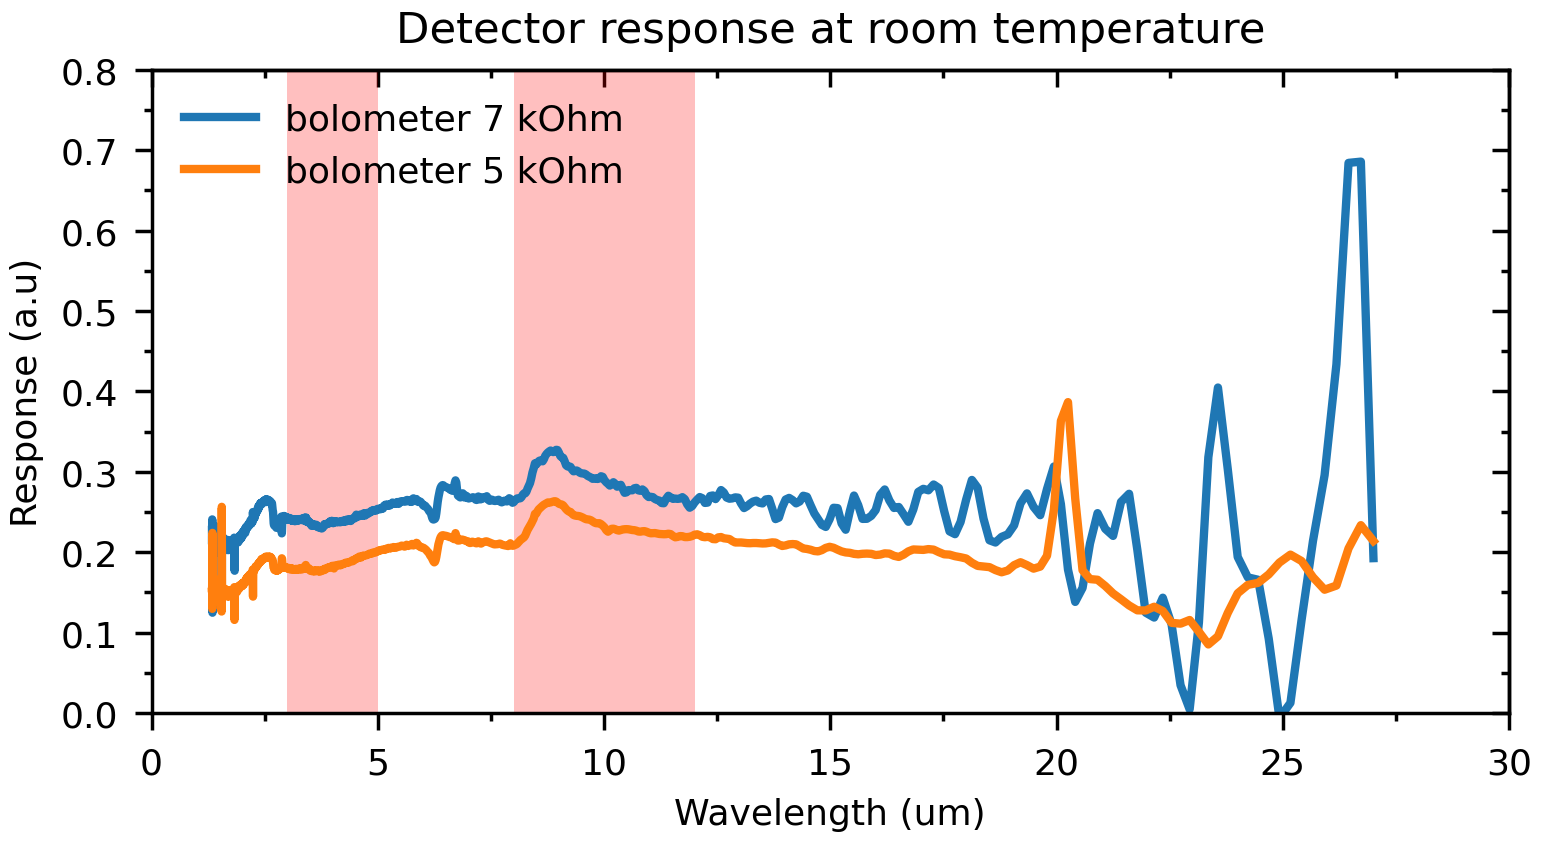

In [461]:
plt.style.use('/home/mik/my_mpl-styles/article-1x1.mplstyle')
plt.rcParams.update(
    {'font.size': 26, 'lines.markersize': 5, 'lines.linewidth': 6,
     'lines.marker': '.'})
fig, ax = plt.subplots(figsize=(16, 9))

# for s in Samples:
#     ax.plot(s.ox, s.oy, label=s.label)

ax.plot(Bolometer1.ox, Bolometer1.oy/Ref.oy, label=Bolometer1.label)
ax.plot(Bolometer2.ox, Bolometer2.oy/Ref.oy, label=Bolometer2.label)

ax.set_ylabel('Response (a.u)')
ax.set_xlabel('Wavelength (um)')
ax.set_ylim(0, None)
ax.fill_between([3, 5], 2, facecolor='red', alpha=0.25)
ax.fill_between([8, 12], 2, facecolor='red', alpha=0.25)
ax.set_title('Detector response at room temperature')

ax.legend(framealpha=0)
add_axes(ax)
